In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

(-0.5, 696.5, 696.5, -0.5)

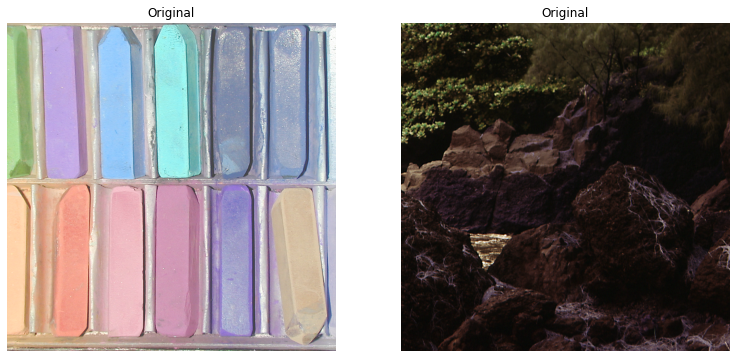

In [2]:
img1 = cv2.imread('chalks_light.tif')
img2 = cv2.imread('stream_dark.tif')

fig = plt.figure(figsize = (20, 15)) 
rows = 2
cols = 3
  
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img1)
ax1.set_title('Original')
ax1.axis("off")
 
                               
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(img2)               
ax2.set_title('Original')
ax2.axis("off")


In [3]:
# For Gamma Transform
def power_of_law(gamma, r):
    c = 255/ (255**gamma)      
    return np.array(c*(r**gamma), dtype = 'uint8') 

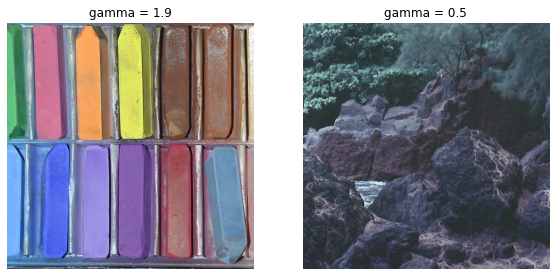

In [4]:
fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
  
ax1 = fig.add_subplot(rows, cols, 1)
img1_gamma = cv2.cvtColor(power_of_law(1.9, img1), cv2.COLOR_BGR2RGB)               # matplot 라이브러리의 imshow함수를 사용하여 영상을 보일경우, RGB 포맷으로 변환해주어야 함
ax1.imshow(img1_gamma)
ax1.set_title('gamma = 1.9')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
img2_gamma = cv2.cvtColor(power_of_law(0.5, img2), cv2.COLOR_BGR2RGB)  # gamma = 0.1
ax2.imshow(img2_gamma)
ax2.set_title('gamma = 0.5')
ax2.axis("off")

plt.show()

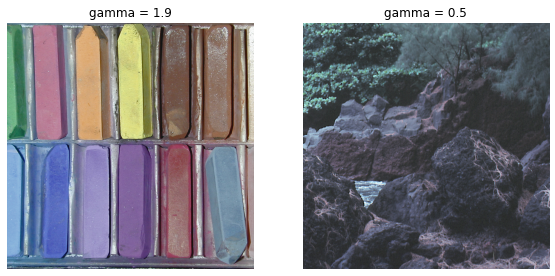

In [79]:
yCrCb = cv2.cvtColor(img1, cv2.COLOR_BGR2YCrCb) # convert RGB to YCbCr
y, Cr, Cb = cv2.split(yCrCb)

# Y Gamma Transform
newY = power_of_law(1.9, y)
yCrCb2 = cv2.merge([newY, Cr, Cb])
yCrCbDst = cv2.cvtColor(yCrCb2, cv2.COLOR_YCrCb2RGB)

yCrCb_ = cv2.cvtColor(img2, cv2.COLOR_BGR2YCrCb)
y_, Cr_, Cb_ = cv2.split(yCrCb_)
newY_ = power_of_law(0.5, y_)
yCrCb2_ = cv2.merge([newY_, Cr_, Cb_])
yCrCbDst_ = cv2.cvtColor(yCrCb2_, cv2.COLOR_YCrCb2RGB)

fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 3
  
ax1 = fig.add_subplot(rows, cols, 1)             # matplot 라이브러리의 imshow함수를 사용하여 영상을 보일경우, RGB 포맷으로 변환해주어야 함
ax1.imshow(yCrCbDst)
ax1.set_title('gamma = 1.9')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(yCrCbDst_)
ax2.set_title('gamma = 0.5')
ax2.axis("off")

plt.show()

In [158]:
hsv = cv2.cvtColor(img1_gamma, cv2.COLOR_BGR2HSV) # convert RGB to HSV
#색상, 채도, 명도
h, s, v = cv2.split(hsv)
newS = power_of_law(0.3, s)
hsv2 = cv2.merge([h,newS,v])
hsvDst = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)

hsv_ = cv2.cvtColor(img2_gamma, cv2.COLOR_BGR2HSV)
#색상, 채도, 명도
h_, s_, v_ = cv2.split(hsv_)
newS_ = power_of_law(0.4,s_)
hsv_ = cv2.merge([h_,newS_,v_])


hsvDst_ = cv2.cvtColor(hsv_, cv2.COLOR_HSV2BGR) # convert HSV to RGB

(-0.5, 696.5, 696.5, -0.5)

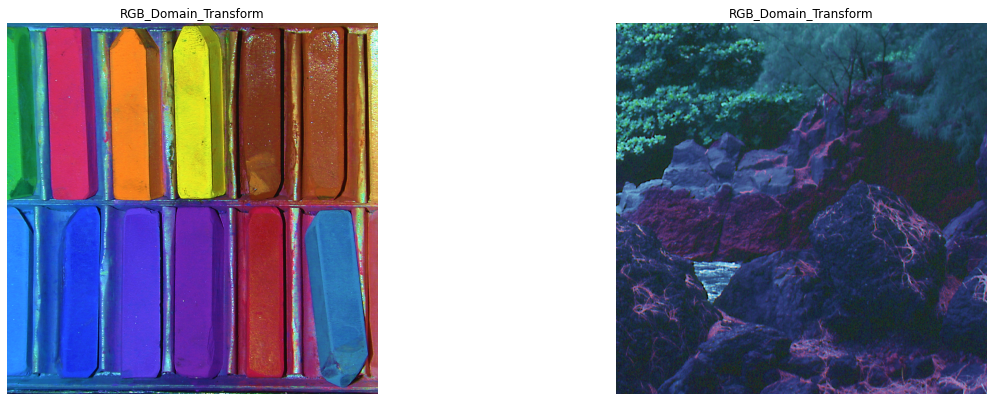

In [159]:
fig = plt.figure(figsize = (20, 15)) 
rows = 2
cols = 2

ax1 = fig.add_subplot(rows, cols, 3)
ax1.imshow(hsvDst)
ax1.set_title('RGB_Domain_Transform')
ax1.axis("off")
 
                               
ax2 = fig.add_subplot(rows, cols, 4)
ax2.imshow(hsvDst_)               
ax2.set_title('RGB_Domain_Transform')
ax2.axis("off")

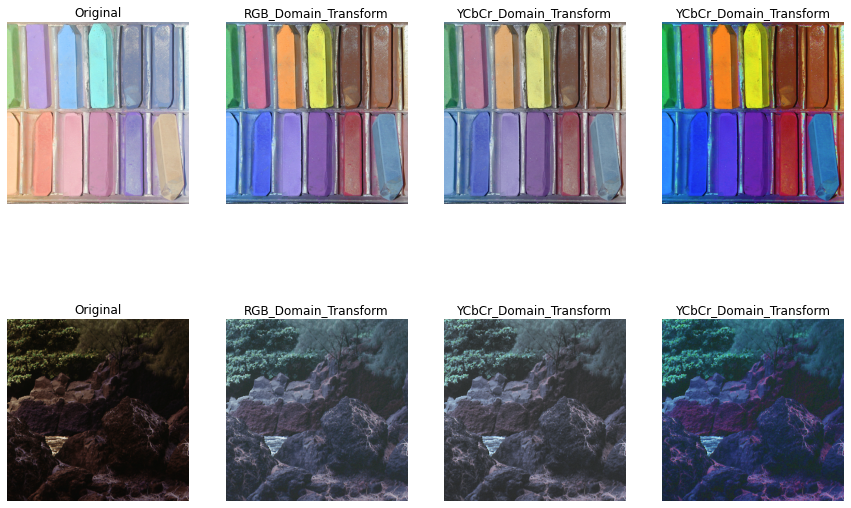

In [161]:
fig = plt.figure(figsize = (15, 10)) # rows*cols 행렬의 i번째 subplot 생성
rows = 2
cols = 4
  
ax1 = fig.add_subplot(rows, cols, 1)            
ax1.imshow(img1)
ax1.set_title('Original')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(img1_gamma)
ax2.set_title('RGB_Domain_Transform')
ax2.axis("off")
 
ax3 = fig.add_subplot(rows, cols, 3) 
ax3.imshow(yCrCbDst)
ax3.set_title('YCbCr_Domain_Transform')
ax3.axis("off")
 
ax4 = fig.add_subplot(rows, cols, 4)
ax4.imshow(hsvDst)
ax4.set_title('YCbCr_Domain_Transform')
ax4.axis("off")

######################################

ax5 = fig.add_subplot(rows, cols, 5)
ax5.imshow(img2)
ax5.set_title('Original')
ax5.axis("off")
 
ax6 = fig.add_subplot(rows, cols, 6)
ax6.imshow(img2_gamma)
ax6.set_title('RGB_Domain_Transform')
ax6.axis("off")

ax7 = fig.add_subplot(rows, cols, 7)
ax7.imshow(yCrCbDst_)
ax7.set_title('YCbCr_Domain_Transform')
ax7.axis("off")
 
ax8 = fig.add_subplot(rows, cols, 8)
ax8.imshow(hsvDst_)
ax8.set_title('YCbCr_Domain_Transform')
ax8.axis("off")


plt.show()